In [1]:
import os
import random
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [2]:
# Code copied and edited from https://www.kaggle.com/code/davids1992/specaugment-quick-implementation

def spec_augment(original_melspec,saving_location,
                 freq_masking_max_percentage = 0.10, 
                 time_masking_max_percentage = 0.21):

    augmented_melspec = original_melspec.copy()
    all_frames_num, all_freqs_num = augmented_melspec.shape

    # Frequency masking
    freq_percentage = random.uniform(0.0, freq_masking_max_percentage)
    num_freqs_to_mask = int(freq_percentage * all_freqs_num)
    f0 = int(np.random.uniform(low = 0.0, high = (all_freqs_num - num_freqs_to_mask)))
    
    augmented_melspec[:, f0:(f0 + num_freqs_to_mask)] = 0

    # Time masking
    time_percentage = random.uniform(0.0, time_masking_max_percentage)
    num_frames_to_mask = int(time_percentage * all_frames_num)
    t0 = int(np.random.uniform(low = 0.0, high = (all_frames_num - num_frames_to_mask)))
    
    augmented_melspec[t0:(t0 + num_frames_to_mask), :] = 0
    plt.imshow(librosa.power_to_db(augmented_melspec,ref=np.max))
    plt.savefig(saving_location,bbox_inches='tight')
    # return augmented_melspec

In [3]:
no_of_augmented_images_tobe_formed = 0
freq_masking_max_percentage = 0.08
time_masking_max_percentage = 0.15


def mel_spectrogram(audio,saving_location):
  y,sr = librosa.load(audio)
  mels = librosa.feature.melspectrogram(y=y,sr=sr)
  # fig = plt.Figure()
  # canvas = FigureCanvas(fig)
  plt.imshow(librosa.power_to_db(mels,ref=np.max))
  plt.axis('off')
  plt.savefig(saving_location,bbox_inches='tight')

  for i in range(no_of_augmented_images_tobe_formed):
    spec_augment(mels,saving_location+'--augmented--'+str(i),freq_masking_max_percentage,time_masking_max_percentage)

In [4]:
audio_folder_path = '/content/drive/MyDrive/Colab Notebooks/test2/new_dataset_2/'
saving_dir = '/content/drive/MyDrive/Colab Notebooks/test2/MEL_techno&semi/'

In [5]:
import warnings
warnings.filterwarnings('ignore')

Word S.No.  1  |   Audio S.No.  0  |   semi  |   Memo 036.m4a
Word S.No.  1  |   Audio S.No.  1  |   semi  |   Memo 040.m4a
Word S.No.  1  |   Audio S.No.  2  |   semi  |   Memo 041.m4a
Word S.No.  1  |   Audio S.No.  3  |   semi  |   Memo 029.m4a
Word S.No.  1  |   Audio S.No.  4  |   semi  |   Memo 030.m4a
Word S.No.  1  |   Audio S.No.  5  |   semi  |   Memo 033.m4a
Word S.No.  1  |   Audio S.No.  6  |   semi  |   Memo 032.m4a
Word S.No.  1  |   Audio S.No.  7  |   semi  |   Memo 031.m4a
Word S.No.  1  |   Audio S.No.  8  |   semi  |   Memo 039.m4a
Word S.No.  1  |   Audio S.No.  9  |   semi  |   Memo 028.m4a
Word S.No.  1  |   Audio S.No.  10  |   semi  |   Memo 037.m4a
Word S.No.  1  |   Audio S.No.  11  |   semi  |   Memo 038.m4a
Word S.No.  1  |   Audio S.No.  12  |   semi  |   Memo 042.m4a
Word S.No.  1  |   Audio S.No.  13  |   semi  |   Memo 034.m4a
Word S.No.  1  |   Audio S.No.  14  |   semi  |   Memo 035.m4a
Word S.No.  1  |   Audio S.No.  15  |   semi  |   Semi 7.m4a
Word

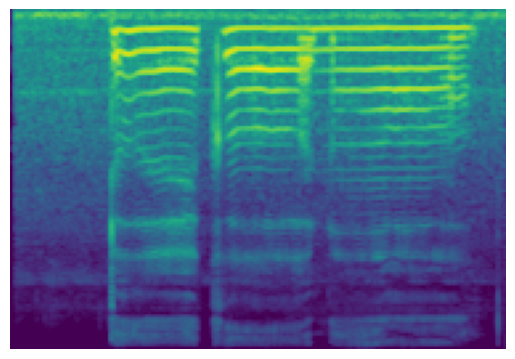

In [6]:
count2=0
word_names = os.listdir(audio_folder_path)
word_names
for word in word_names:
  audio_path = audio_folder_path + word
  audio_names = os.listdir(audio_path)
  count2=count2+1
  if not os.path.exists(saving_dir+word):
    os.mkdir(saving_dir+word)
  count = 0
  # print(audio_names)
  for audio in audio_names:
    print('Word S.No. ',count2,' |  ','Audio S.No. ',count,' |  ',word,' |  ',audio)
    count=count+1
    saving_location = saving_dir+word+'/'+audio.split('.')[0]
    mel_spectrogram(audio_path+'/'+audio,saving_location)

In [ ]:
# root_words = ['a','ab','ac','ad','acro','act','aer','agr','alg','ampi','amphi','ambul','ami','ana','andr',
#               'anim','ann','ante','anti','anth','aqu','arbour','arch','arth','art','astro','auto','be','bi',
#               'bio','capt','cept','cardil','carn','cata','caust','caut','ceed','cede','centi','centr',
#               'cert','chrom','cise','cide','circum','claim','clar','clus','cline','clo','con','com','col',
#               'cogn','contra','corp','cred','crypto','cycl','cumul','de','dec','deci','dem','dendr','dent',
#               'di','dia','derm','dict','domin','du','don','dyn','dys','ego','em','en','enn','ep','equ',
#               'erg','esth','eu','ethno','ex','extra','fac','funct','hetero','hex','histo','homo','hydr','hygr',
#               'hyper','hyp','iatr','icon','idio','il','in','ig','im','imag','infra','inter','intra','intro',
#               'ir','iso','ject','jud','junct','killo','kine','lab','lact','later','lex','liber','lingu','loc',
#               'log','loqo','luco','luc','lud','lus','lum','lun','macro','magn','mal','man','mand','mania',
#               'mar','mater','max','medi','mega','melan','memor','merg','meso','meta','meter','micro','mid',
#               'milli','min','miss','mob','mon','mor','multi','mut','nar','nav','necr','neg','neo','nephr',
#               'neur','norm','nor','not','noun','nummer','ob','op','oct','ocu','omni','ortho','osteo','out',
#               'over','oxy','pale','pan','para','part','pater','path','ped','pel','pent','pept','per','peri','phag',
#               'phil','phon','phot','phys','pod','poli','poly','pon','pop','port','pos','post','pre','pro','prot',
#               'pseudo','psych','pugn','pul','purg','put','pyr','quad','quart','quin','radic','radio','ram','re',
#               'reg','retro','rhin','rhod','rid','rupt','san','scend','sci','scop','scrib','script','se','sect','self',
#               'semi','sept','serv','sol','somn','son','sphere','sta','stell','struct','sub','sum','super','sy','tact',
#               'tax','techno','tel','temp','ter','term','tetra','the','therm','tort','tox','tract','trans','tri','ultra',
#               'un','uni','urb','vac','vent','ver','verb','vers','vert','vice','vide','vis','voc','vol','xen','xer','zo']

# len(root_words)

In [ ]:
# used_words = ['intra','memor','vert']

In [ ]:
# from IPython.display import Audio

In [ ]:
# audio_path = ['/content/drive/MyDrive/Colab Notebooks/test2/intra/','/content/drive/MyDrive/Colab Notebooks/test2/memor/', '/content/drive/MyDrive/Colab Notebooks/test2/vert/']
# train_saving_dir = ['/content/drive/MyDrive/Colab Notebooks/test2/train/intra/','/content/drive/MyDrive/Colab Notebooks/test2/train/memor/','/content/drive/MyDrive/Colab Notebooks/test2/train/vert/']
# test_saving_dir = ['/content/drive/MyDrive/Colab Notebooks/test2/test/intra/','/content/drive/MyDrive/Colab Notebooks/test2/test/memor/','/content/drive/MyDrive/Colab Notebooks/test2/test/vert/']

In [ ]:
# def mel_spectrogram(path,filename,saving_path):
#   path=path+filename
#   y,sr = librosa.load(path)
#   mels = librosa.feature.melspectrogram(y=y,sr=sr)
#   fig = plt.Figure()
#   canvas = FigureCanvas(fig)
#   p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
#   savename=filename.split('.')[0]
#   plt.savefig(saving_path+savename)

In [ ]:
# audio_path

In [ ]:
# import os
# import random

# input_folder = audio_path[2]
# train_save_dir = train_saving_dir[2]
# test_save_dir = test_saving_dir[2]
# count=0

# filesnames = os.listdir(input_folder)
# files = random.shuffle(filesnames)

# for file in files:
#   count=count+1
#   save_dir = train_save_dir
  
#   if count>len(files)-2:
#     save_dir = test_save_dir

#   mel_spectrogram(input_folder,file,save_dir)